# **ESERCIZI LEZIONE 4**

### ***1. LA LEGGE DEI GRANDI NUMERI***

50.0


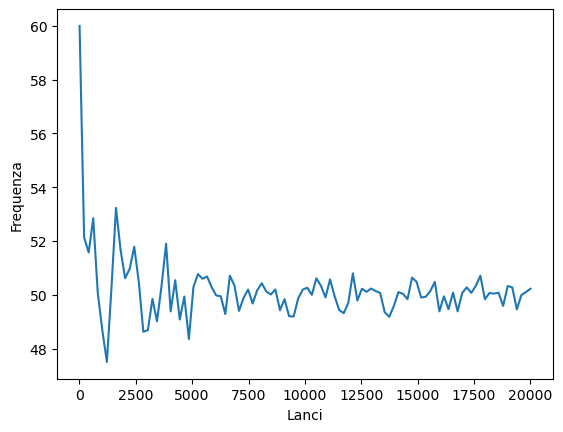

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def frequenza_testa(N):
    lanci = np.random.choice(["Testa","Croce"], size=(N))
    teste = np.sum(lanci == "Testa")
    freq = 100*teste/N
    return freq

n = 10
result = frequenza_testa(n)
print(result)

campioni = np.linspace(10, 20000, 100, dtype = int)

frequenza_teste = [float(frequenza_testa(N)) for N in campioni]

plt.plot(campioni, frequenza_teste)
plt.xlabel("Lanci")
plt.ylabel("Frequenza")
plt.show()

### ***2. ANALISI DEL DATASET DEL TITANIC***

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
print(len(df))

print(df.isnull().sum())

df["Embarked"].fillna(df["Embarked"].mode()[0])

891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [25]:
df.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [27]:
df.groupby('Pclass')['Age'].mean()
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

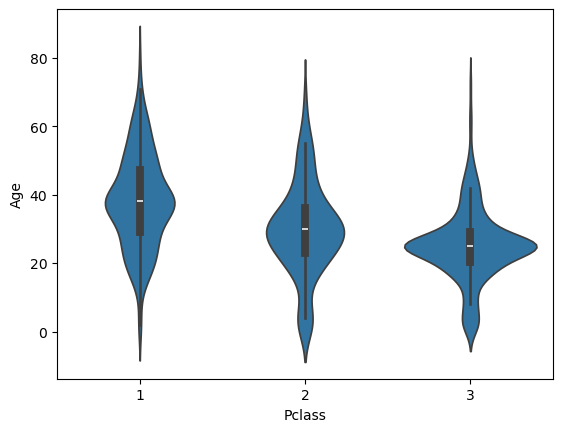

In [28]:
sns.violinplot(x='Pclass', y='Age', data=df)
plt.show()

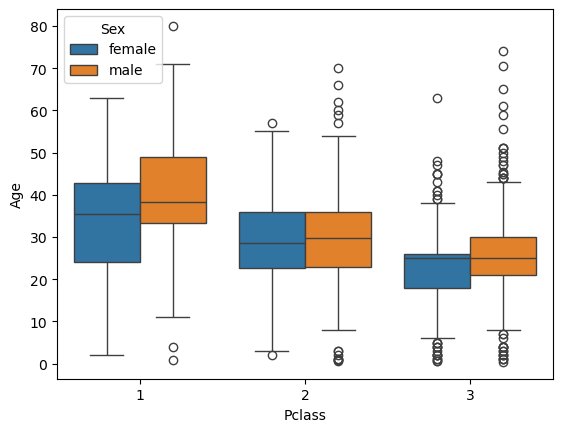

In [29]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.show()

### ***3. ANALISI DEL DATASET IRIS***

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [32]:
df.groupby("species")["petal_length"].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

In [33]:
df.groupby("species")["petal_width"].mean()

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

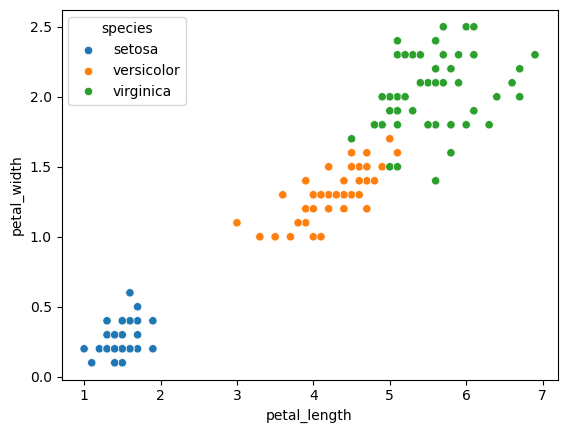

In [34]:
sns.scatterplot(x = "petal_length", y = "petal_width", hue = "species", data = df)
plt.show()

In [35]:
df["area"] = df["petal_length"]*df["petal_width"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


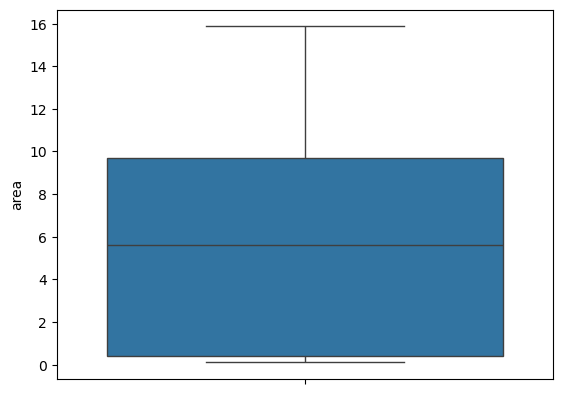

In [36]:
sns.boxplot(data = df, y="area")
plt.show()